In [9]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline, FeatureUnion
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
data_x = np.load("data_x.npy")
data_y = np.load("data_y.npy")

In [13]:
iris = sns.load_dataset("iris")
print(iris)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
5             5.4          3.9           1.7          0.4     setosa
6             4.6          3.4           1.4          0.3     setosa
7             5.0          3.4           1.5          0.2     setosa
8             4.4          2.9           1.4          0.2     setosa
9             4.9          3.1           1.5          0.1     setosa
10            5.4          3.7           1.5          0.2     setosa
11            4.8          3.4           1.6          0.2     setosa
12            4.8          3.0           1.4          0.1     setosa
13            4.3          3.0    

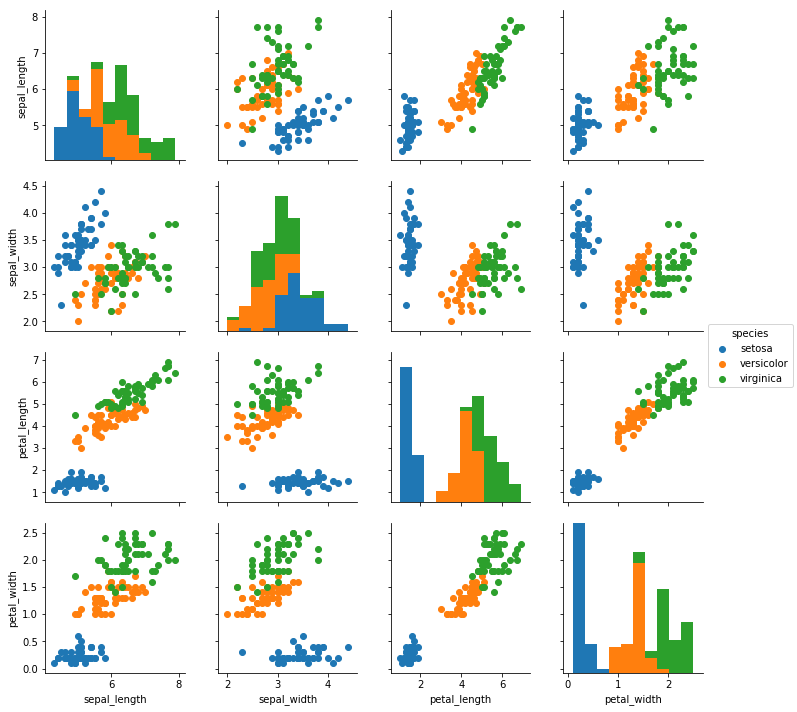

In [16]:
g = sns.PairGrid(iris, hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

C:\Users\jichang\Anaconda3\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\jichang\Anaconda3\anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\jichang\Anaconda3\anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\jichang\Anaconda3\anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\jichang\Anaconda3\anaconda3\lib\site-packages\matplotlib\contour.py:960: Us

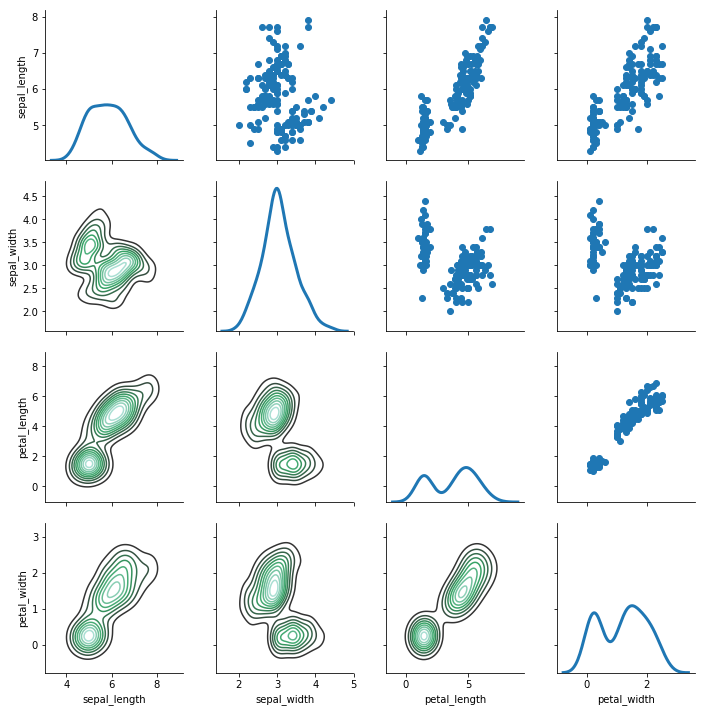

In [21]:
g = sns.PairGrid(iris)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data_x,data_y,test_size=0.2,shuffle=True,random_state=10,stratify=data_y)

In [26]:
pca = PCA(n_components=2)

In [29]:
selection = SelectKBest(chi2, k=2)

In [32]:
combined_features = FeatureUnion([("pca", pca), ("chi2_select", selection)])

In [34]:
pipe = Pipeline([("features", combined_features),("standard", StandardScaler()),("knn", KNeighborsClassifier())])

In [37]:
params = {'features__pca__n_components': [1, 2, 3],
          'features__chi2_select__k':[1, 2],
          'knn__n_neighbors': [1, 3, 5],
          'knn__p': [1, 2]}

In [40]:
clf = GridSearchCV(pipe, param_grid=params, cv=10)

In [51]:
clf.fit(X_train, y_train)
means = clf.cv_results_['mean_test_score']
stds =  clf.cv_results_['std_test_score']
print(means)

[0.90833333 0.90833333 0.93333333 0.93333333 0.94166667 0.94166667
 0.93333333 0.93333333 0.95       0.95       0.96666667 0.975
 0.94166667 0.91666667 0.95       0.925      0.93333333 0.90833333
 0.93333333 0.94166667 0.94166667 0.94166667 0.95       0.95833333
 0.95       0.95833333 0.95       0.96666667 0.95833333 0.98333333
 0.95       0.95       0.94166667 0.95       0.95       0.925     ]


In [52]:
print(stds)

[0.08700255 0.08700255 0.08164966 0.08164966 0.08374896 0.08374896
 0.06236096 0.06236096 0.04082483 0.05527708 0.04082483 0.03818813
 0.075      0.09128709 0.05527708 0.1204736  0.08164966 0.1017213
 0.06236096 0.05335937 0.08374896 0.08374896 0.06666667 0.06718548
 0.06666667 0.0559017  0.05527708 0.05527708 0.0559017  0.03333333
 0.06666667 0.06666667 0.075      0.07637626 0.05527708 0.07861651]


In [54]:
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params)) 

0.908 (+/-0.174) for {'features__chi2_select__k': 1, 'features__pca__n_components': 1, 'knn__n_neighbors': 1, 'knn__p': 1}
0.908 (+/-0.174) for {'features__chi2_select__k': 1, 'features__pca__n_components': 1, 'knn__n_neighbors': 1, 'knn__p': 2}
0.933 (+/-0.163) for {'features__chi2_select__k': 1, 'features__pca__n_components': 1, 'knn__n_neighbors': 3, 'knn__p': 1}
0.933 (+/-0.163) for {'features__chi2_select__k': 1, 'features__pca__n_components': 1, 'knn__n_neighbors': 3, 'knn__p': 2}
0.942 (+/-0.167) for {'features__chi2_select__k': 1, 'features__pca__n_components': 1, 'knn__n_neighbors': 5, 'knn__p': 1}
0.942 (+/-0.167) for {'features__chi2_select__k': 1, 'features__pca__n_components': 1, 'knn__n_neighbors': 5, 'knn__p': 2}
0.933 (+/-0.125) for {'features__chi2_select__k': 1, 'features__pca__n_components': 2, 'knn__n_neighbors': 1, 'knn__p': 1}
0.933 (+/-0.125) for {'features__chi2_select__k': 1, 'features__pca__n_components': 2, 'knn__n_neighbors': 1, 'knn__p': 2}
0.950 (+/-0.082)

In [55]:
print("best CV_score: %0.3f   best parameter: %r" % (clf.best_score_, clf.best_params_))

best CV_score: 0.983   best parameter: {'features__chi2_select__k': 2, 'features__pca__n_components': 2, 'knn__n_neighbors': 5, 'knn__p': 2}


In [56]:
score = clf.score(X_test, y_test)
print("test score:", score)

test score: 1.0
